<a href="https://colab.research.google.com/github/adityarosyitama/adult_income_scoring/blob/main/adult_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

file_path = 'drive/MyDrive/Colab Notebooks/adult_income1.csv'
df = pd.read_csv(file_path)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,native_country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
31942,90,?,175444,7th-8th,4,Separated,?,Not-in-family,White,Female,United-States,<=50K
31943,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
31944,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
31945,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,United-States,>50K


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31947 entries, 0 to 31946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31947 non-null  int64 
 1   workclass       31947 non-null  object
 2   fnlwgt          31947 non-null  int64 
 3   education       31947 non-null  object
 4   education_num   31947 non-null  int64 
 5   marital_status  31947 non-null  object
 6   occupation      31947 non-null  object
 7   relationship    31947 non-null  object
 8   race            31947 non-null  object
 9   sex             31947 non-null  object
 10  native_country  31947 non-null  object
 11  income          31947 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.9+ MB


In [6]:
# clean null jika ada
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31947 entries, 0 to 31946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31947 non-null  int64 
 1   workclass       31947 non-null  object
 2   fnlwgt          31947 non-null  int64 
 3   education       31947 non-null  object
 4   education_num   31947 non-null  int64 
 5   marital_status  31947 non-null  object
 6   occupation      31947 non-null  object
 7   relationship    31947 non-null  object
 8   race            31947 non-null  object
 9   sex             31947 non-null  object
 10  native_country  31947 non-null  object
 11  income          31947 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.9+ MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education_num'}>, <Axes: >]],
      dtype=object)

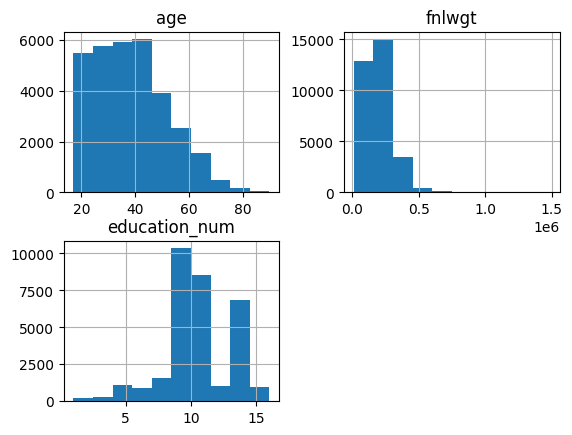

In [9]:
# cek data yang mengandung number dengan tampilan normalization
data.hist()

In [10]:
data['fnlwgt'] = np.log(data['fnlwgt'] + 1)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education_num'}>, <Axes: >]],
      dtype=object)

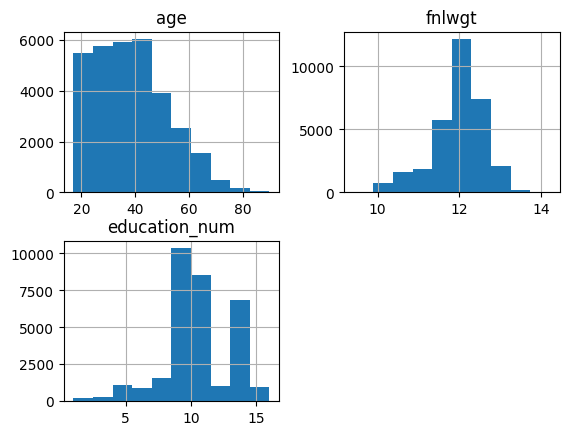

In [11]:
# cek data yang mengandung number dengan tampilan normalization
data.hist()

In [15]:
# cek data colom
data.marital_status.value_counts()


Married-civ-spouse       14675
Never-married            10475
Divorced                  4397
Separated                 1004
Widowed                    975
Married-spouse-absent      398
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [16]:
data.relationship.value_counts()


Husband           12932
Not-in-family      8154
Own-child          4994
Unmarried          3384
Wife               1532
Other-relative      951
Name: relationship, dtype: int64

In [17]:
data.income.value_counts()


<=50K    24264
>50K      7683
Name: income, dtype: int64

In [18]:
# hapus coloum yang tidak diperlukan dalam perhitungan karena kebanyakan
data = data.drop(['workclass'],axis=1)
data = data.drop(['education'],axis=1)
data = data.drop(['occupation'],axis=1)
data = data.drop(['race'],axis=1)
data = data.drop(['sex'],axis=1)
data = data.drop(['native_country'],axis=1)


In [27]:
data

,age,fnlwgt,education_num,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,<=50K,>50K
0,17,11.908495,7,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,17,11.442889,8,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,17,12.127706,5,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,17,11.666736,7,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,17,12.254625,7,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31942,90,12.075081,4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
31943,90,12.182978,9,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
31944,90,10.777497,9,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
31945,90,12.657107,9,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31947 entries, 0 to 31946
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             31947 non-null  int64  
 1   fnlwgt          31947 non-null  float64
 2   education_num   31947 non-null  int64  
 3   marital_status  31947 non-null  object 
 4   relationship    31947 non-null  object 
 5   income          31947 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ MB


In [21]:
# untuk mengubah colom berisikan string ke dalam number able untuk di lakukan perhitungan
pd.get_dummies(data.income)


,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
31942,1,0
31943,1,0
31944,1,0
31945,0,1


In [22]:
# fungsi ini berguna untuk mengabungkan data dummy yang sudah dibuat untuk mengubah string menjadi number able yang dapat dilakukan perhitungan
# dan menghapus kolom asal yang berisikan string
#  data.join(pd.get_dummies(data.workclass)).drop(['workclass'],axis=1)

In [23]:
data = data.join(pd.get_dummies(data.marital_status)).drop(['marital_status'],axis=1)
data = data.join(pd.get_dummies(data.relationship)).drop(['relationship'],axis=1)
data = data.join(pd.get_dummies(data.income)).drop(['income'],axis=1)


In [24]:
data

,age,fnlwgt,education_num,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,<=50K,>50K
0,17,11.908495,7,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,17,11.442889,8,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,17,12.127706,5,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,17,11.666736,7,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,17,12.254625,7,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31942,90,12.075081,4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
31943,90,12.182978,9,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
31944,90,10.777497,9,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
31945,90,12.657107,9,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'Divorced'}>],
       [<Axes: title={'center': 'Married-AF-spouse'}>,
        <Axes: title={'center': 'Married-civ-spouse'}>,
        <Axes: title={'center': 'Married-spouse-absent'}>,
        <Axes: title={'center': 'Never-married'}>],
       [<Axes: title={'center': 'Separated'}>,
        <Axes: title={'center': 'Widowed'}>,
        <Axes: title={'center': 'Husband'}>,
        <Axes: title={'center': 'Not-in-family'}>],
       [<Axes: title={'center': 'Other-relative'}>,
        <Axes: title={'center': 'Own-child'}>,
        <Axes: title={'center': 'Unmarried'}>,
        <Axes: title={'center': 'Wife'}>],
       [<Axes: title={'center': '<=50K'}>,
        <Axes: title={'center': '>50K'}>, <Axes: >, <Axes: >]],
      dtype=object)

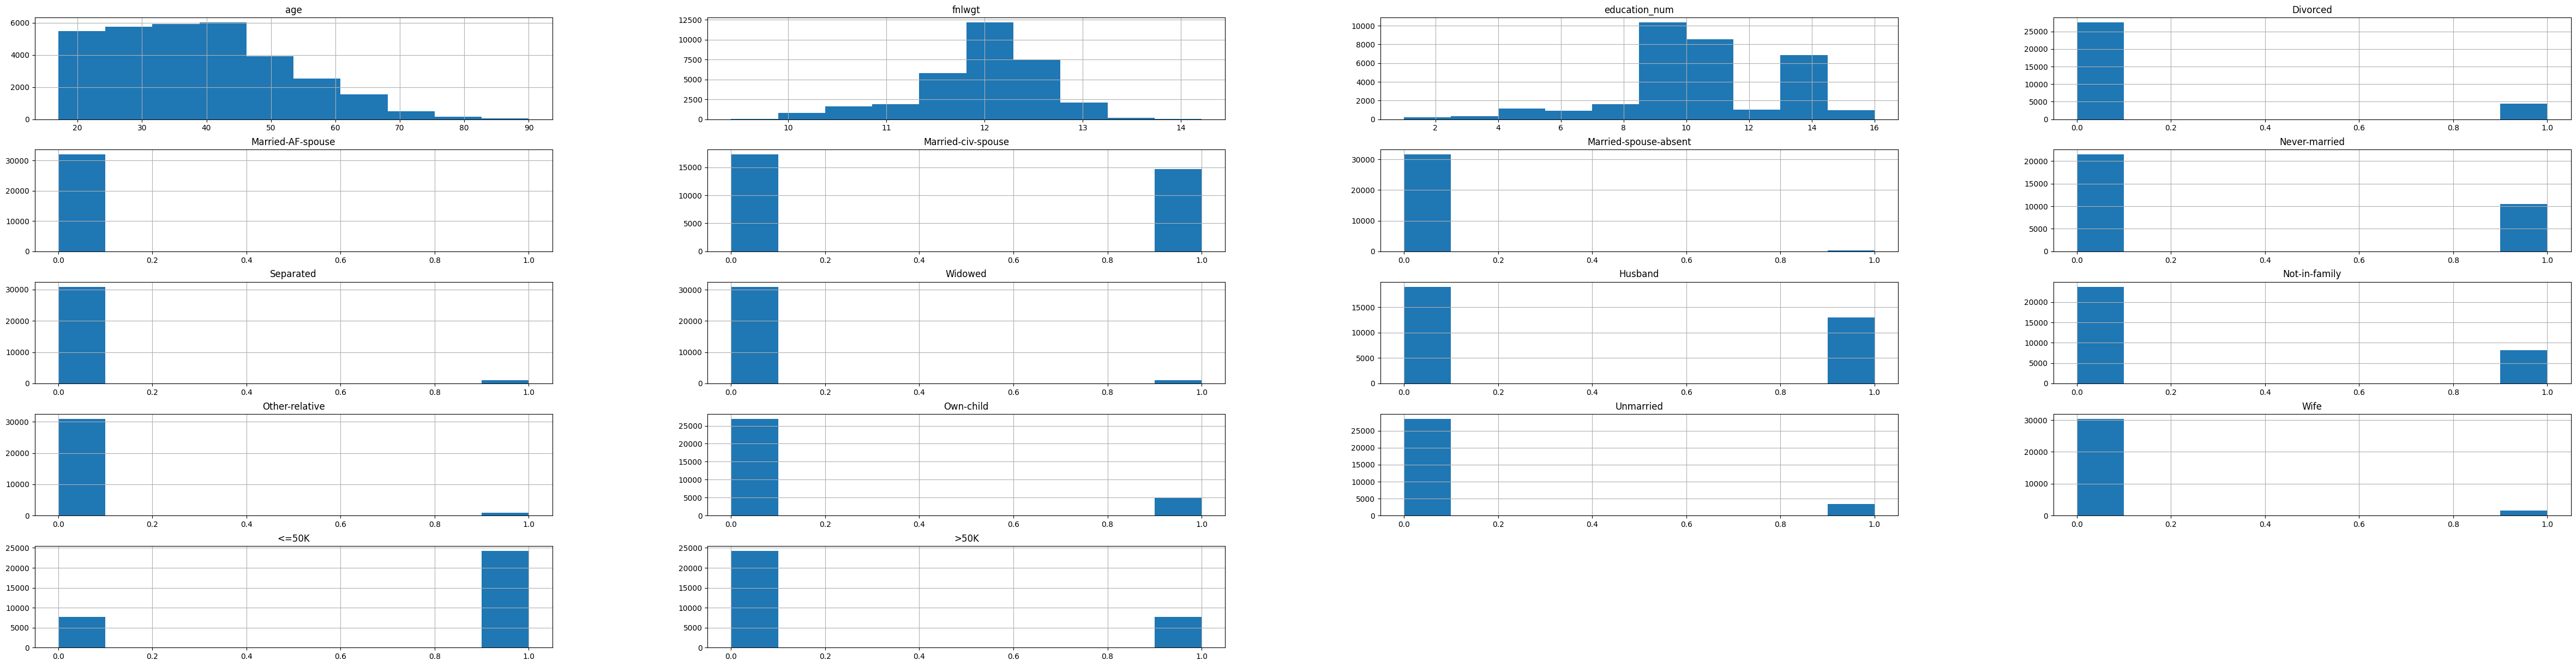

In [25]:
data.hist(figsize=(60,15))

<Axes: >

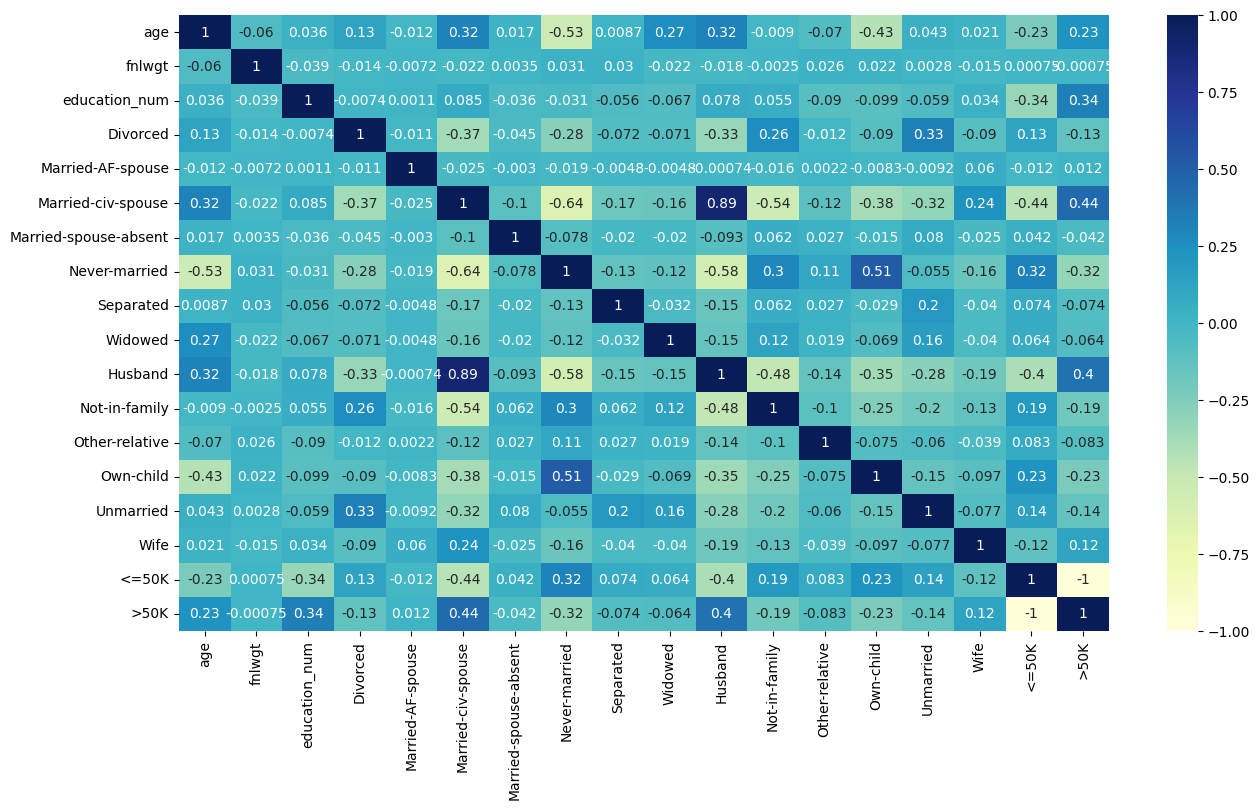

In [29]:
# gambaran corelasi
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [39]:
# tambah corelasi perbandingan baru
# data['income_ratio'] = data['>50K'] - data['<=50K']
# data = data.drop(['income_ratio'],axis=1)
data

,age,fnlwgt,education_num,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,<=50K,>50K
0,17,11.908495,7,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,17,11.442889,8,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,17,12.127706,5,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,17,11.666736,7,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,17,12.254625,7,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31942,90,12.075081,4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
31943,90,12.182978,9,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
31944,90,10.777497,9,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
31945,90,12.657107,9,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [40]:
from sklearn.model_selection import train_test_split

x = data.drop(['<=50K', '>50K'], axis=1)
y = data[['<=50K', '>50K']]  # Memilih kedua kolom sebagai target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
# untuk mengecek data train
train_data = x_train.join(y_train)
train_data

,age,fnlwgt,education_num,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,<=50K,>50K
12679,33,11.450316,9,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
18179,40,12.123267,11,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
27483,54,10.476161,9,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
15319,36,12.116498,13,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
29881,61,11.733257,6,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,61,12.024886,13,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
5390,24,11.780981,13,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
860,18,12.437371,9,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
15795,37,12.640099,13,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'Divorced'}>],
       [<Axes: title={'center': 'Married-AF-spouse'}>,
        <Axes: title={'center': 'Married-civ-spouse'}>,
        <Axes: title={'center': 'Married-spouse-absent'}>,
        <Axes: title={'center': 'Never-married'}>],
       [<Axes: title={'center': 'Separated'}>,
        <Axes: title={'center': 'Widowed'}>,
        <Axes: title={'center': 'Husband'}>,
        <Axes: title={'center': 'Not-in-family'}>],
       [<Axes: title={'center': 'Other-relative'}>,
        <Axes: title={'center': 'Own-child'}>,
        <Axes: title={'center': 'Unmarried'}>,
        <Axes: title={'center': 'Wife'}>],
       [<Axes: title={'center': '<=50K'}>,
        <Axes: title={'center': '>50K'}>, <Axes: >, <Axes: >]],
      dtype=object)

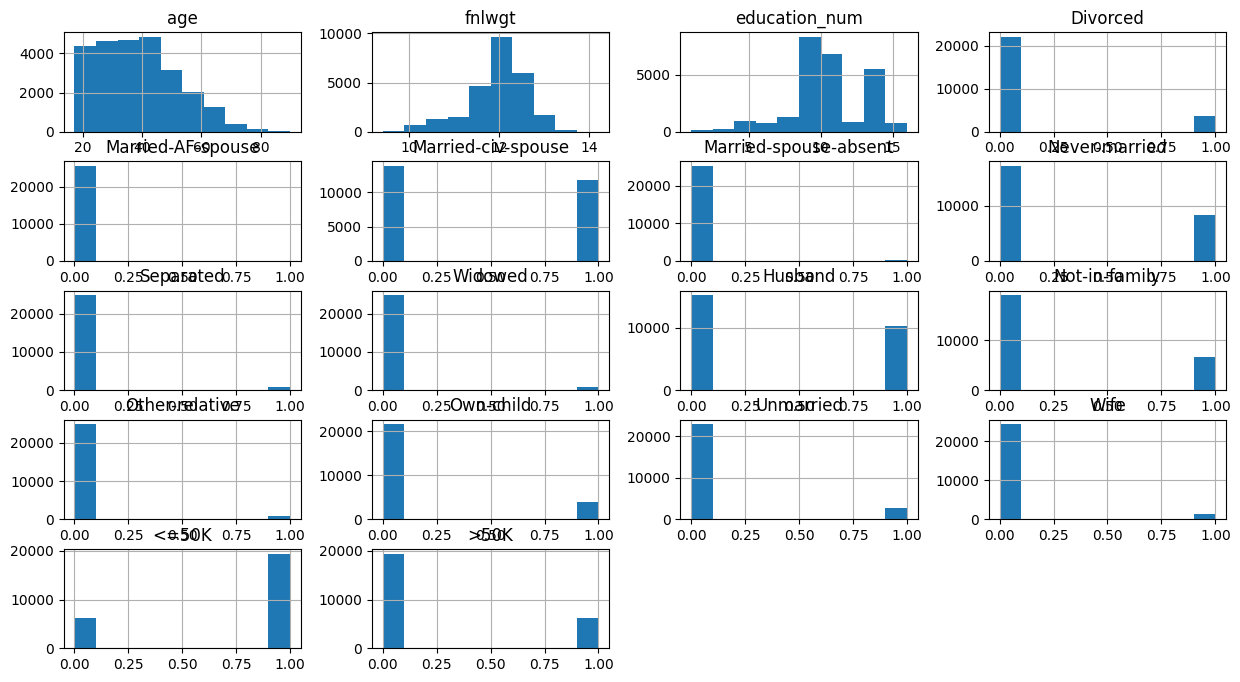

In [44]:
train_data.hist(figsize=(15,8))

In [45]:
train_data.corr()

,age,fnlwgt,education_num,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,<=50K,>50K
age,1.000000,-0.061859,0.033058,0.131672,-0.015464,0.315334,0.016119,-0.537329,0.011947,0.266080,0.317423,-0.007663,-0.068363,-0.434169,0.041669,0.017356,-0.229475,0.229475
fnlwgt,-0.061859,1.000000,-0.037997,-0.015769,-0.009542,-0.020411,0.001219,0.032623,0.025783,-0.023427,-0.015421,-0.003162,0.023433,0.024031,-0.000226,-0.017213,0.000740,-0.000740
education_num,0.033058,-0.037997,1.000000,-0.006259,0.001556,0.078951,-0.041590,-0.023958,-0.056191,-0.067124,0.073634,0.056451,-0.088848,-0.095865,-0.055324,0.028586,-0.333453,0.333453
Divorced,0.131672,-0.015769,-0.006259,1.000000,-0.010941,-0.369503,-0.044736,-0.279667,-0.072151,-0.071591,-0.330993,0.262417,-0.011626,-0.088951,0.328302,-0.089498,0.128041,-0.128041
Married-AF-spouse,-0.015464,-0.009542,0.001556,-0.010941,1.000000,-0.025127,-0.003042,-0.019018,-0.004906,-0.004868,0.000887,-0.015991,-0.004752,-0.007760,-0.009413,0.061458,-0.018324,0.018324
Married-civ-spouse,0.315334,-0.020411,0.078951,-0.369503,-0.025127,1.000000,-0.102742,-0.642289,-0.165703,-0.164417,0.894499,-0.537535,-0.113143,-0.380818,-0.317920,0.238516,-0.441918,0.441918
Married-spouse-absent,0.016119,0.001219,-0.041590,-0.044736,-0.003042,-0.102742,1.000000,-0.077763,-0.020062,-0.019906,-0.092034,0.059173,0.022577,-0.015595,0.085902,-0.024885,0.041799,-0.041799
Never-married,-0.537329,0.032623,-0.023958,-0.279667,-0.019018,-0.642289,-0.077763,1.000000,-0.125416,-0.124443,-0.575348,0.299286,0.103416,0.509925,-0.056724,-0.155569,0.315352,-0.315352
Separated,0.011947,0.025783,-0.056191,-0.072151,-0.004906,-0.165703,-0.020062,-0.125416,1.000000,-0.032105,-0.148433,0.054620,0.032403,-0.026503,0.200073,-0.040135,0.073082,-0.073082
Widowed,0.266080,-0.023427,-0.067124,-0.071591,-0.004868,-0.164417,-0.019906,-0.124443,-0.032105,1.000000,-0.147281,0.122459,0.022411,-0.070440,0.159198,-0.039824,0.064674,-0.064674


<Axes: >

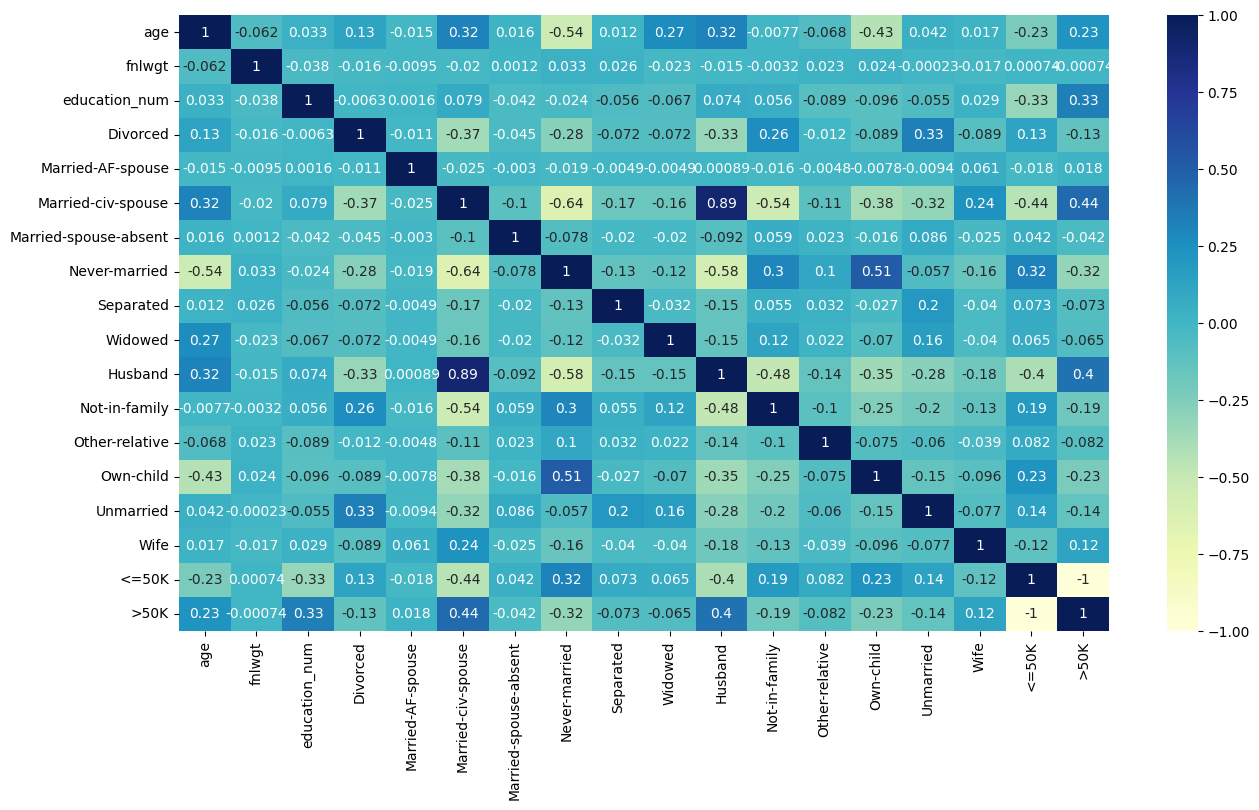

In [46]:
# gambaran corelasi
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [54]:
# untuk membuat tampilan scatter plot
# plt.figure(figsize=(15,8))
# sns.scatterplot(x="Husband", y=">50K", data=train_data, hue="fnlwgt", palette="coolwarm")

In [69]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [70]:
reg.score(x_test, y_test)

0.3078750677038941

In [71]:
# menggunakan StandardScaler untuk menigkatkan persentase score
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# x_train_s = scaler.fit_transform(x_train)

# reg.fit(x_train_s, y_train)
# x_test_s = scaler.fit_transform(x_test)
# reg.score(x_test_s, y_test)

# nilai score tambah jelek jadi tidak menggunakan StandardScaler

In [72]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)


RandomForestRegressor()

In [73]:
forest.score(x_test, y_test)

0.22898197286147226

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[100,200,300],
    "max_features":[2,4],
    "max_depth":[4,8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8], 'max_features': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True)

In [80]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=8, max_features=4, n_estimators=200)

In [81]:
grid_search.best_estimator_.score(x_test, y_test)

0.3556820070585083